## Phase Three Project Submission

Please fill out:
* Student name: Victor Keya
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Noah Kandie
* Blog post URL:

# 1. Introduction

## Business problem

SyriaTel company wants to reduce customer churn, which refers to customers switching to a different 
service provider. Customer churn can be costly for SyriaTel in terms of lost revenue and acquisition costs for new
customers. By identifying customers who are likely to churn, SyriaTel can take proactive measures to retain them, such 
as offering special promotions or personalized services.

## Objectives

1. Implement a predictive churn modeling solution

2. Address customer retention.

3. Reduce churn rates.

4. Improve customer satisfaction and profitability.

# 2. Importing libraries and Loading Data

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## 2.1 Load CSV File

In [2]:
df = pd.read_csv(r"C:\Users\Victor Keya\Documents\Flatiron\Phase3_Project\bigml_59c28831336c6604c800002a.csv")
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

## 2.2 Limitations

1. Phone Number Column: The 'phone number' column is likely irrelevant for predictive modeling and should be removed or 
   transformed.

2. Geographic Information: The 'state' column may introduce regional biases and might need to be encoded properly or 
   analyzed for its impact on churn.
    
3. Account Length: While this could be a significant feature, without context (e.g., is a longer account length 
   generally better or worse?), it might be hard to interpret its impact directly.

# 3. Data Understanding

In [3]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
df.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [5]:
df.sample()

state  account length  area code phone number international plan  \
1570    NE             112        415     388-4282                 no   

     voice mail plan  number vmail messages  total day minutes  \
1570              no                      0              167.6   

      total day calls  total day charge  ...  total eve calls  \
1570              100             28.49  ...               90   

      total eve charge  total night minutes  total night calls  \
1570             13.13                281.4                107   

      total night charge  total intl minutes  total intl calls  \
1570               12.66                17.3                 3   

      total intl charge  customer service calls  churn  
1570               4.67                       2  False  

[1 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has 3333 rows and 21 columns.

No null values in the dataset.

Data types in the data set include floats, integers, objects and boolean.

In [7]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

This gives a summary of the distribution of the numeric data. From the count, we can see which columns have numeric data.

## 3.1 Data Cleaning

### Lets make a copy of the dataset first

In [8]:
df1 = df.copy()
df1

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

#### Drop the Phone Number column

In [9]:
df1 = df1.drop('phone number', axis=1)

In [10]:
df1

state  account length  area code international plan voice mail plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

#### Handle missing values

In [11]:
df1.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Dataset has no missing values

#### Check for duplicates

In [12]:
df1.duplicated().sum()

0

No duplicates in this Dataset.

In [13]:
# Encode categorical variables
df1['international plan'] = df1['international plan'].map({'yes': 1, 'no': 0})
df1['voice mail plan'] = df1['voice mail plan'].map({'yes': 1, 'no': 0})
df1['churn'] = df1['churn'].astype(int)


In [14]:
df1

state  account length  area code  international plan  voice mail plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    AZ             192        415                   0                1   
3329    WV              68        415                   0                0   
3330    RI              28        510                   0                0   
3331    CT             184        510                   1                0   
3332    TN              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9      

In [41]:
# Calculate the churn rate
churn_rate = df1['Churn'].mean()

# Display the churn rate
print(f'Overall Churn Rate: {churn_rate:.2%}')

Overall Churn Rate: 14.49%


In [16]:
# Check data types
print("\nData Types:")
print(df1.dtypes)


Data Types:
state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object


#### Outliers

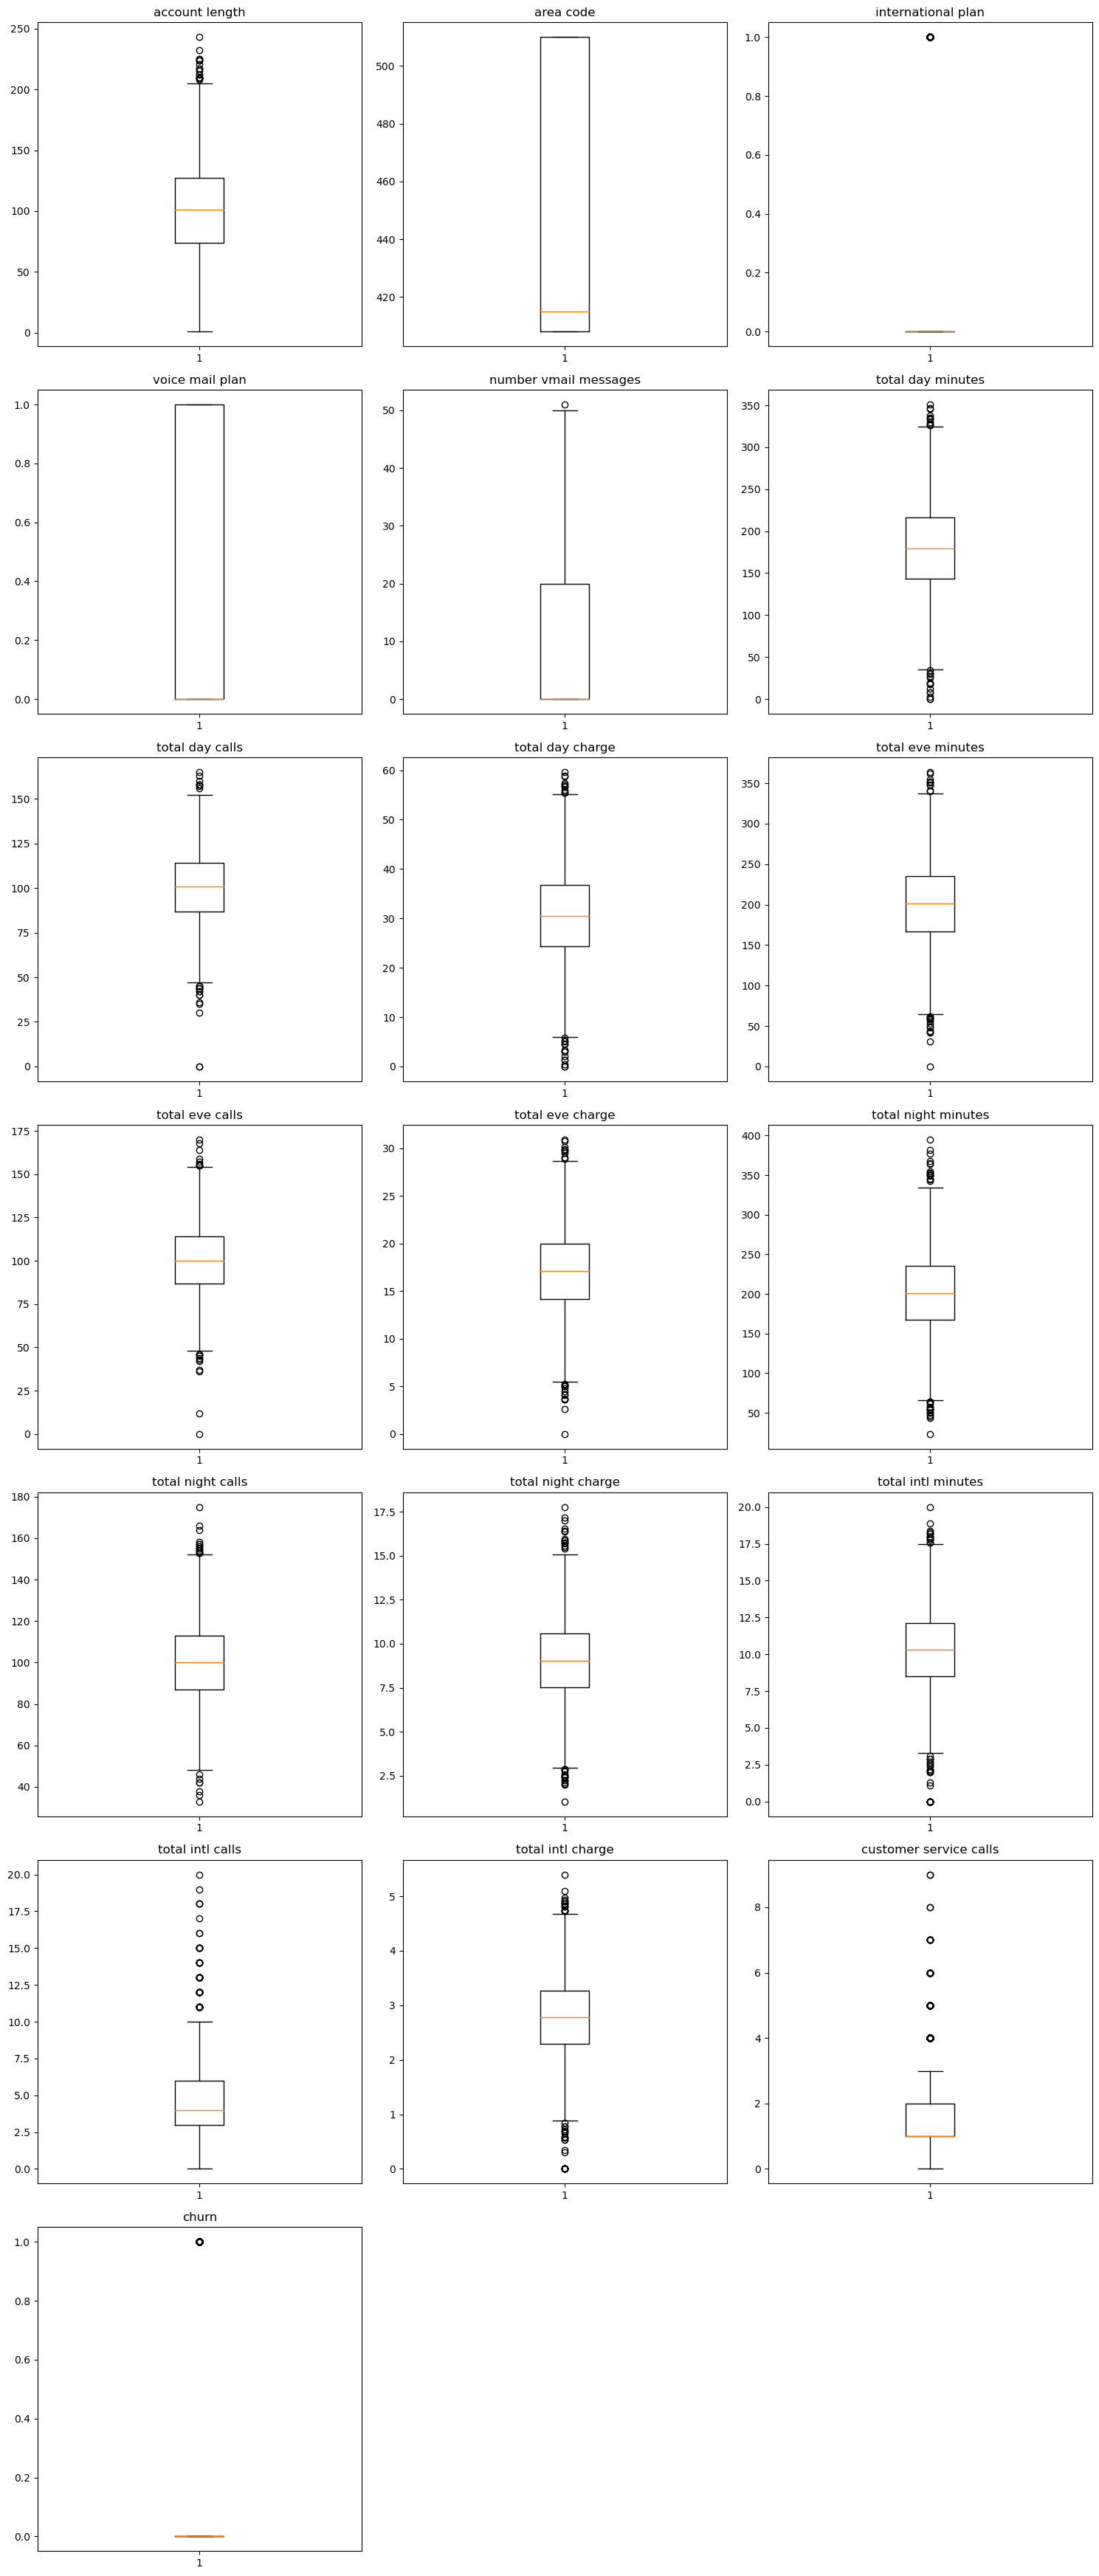

In [17]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Skewness and Kurtosis

In [18]:
# Drop non-numeric columns to focus on numerical data
numeric_df = df1.drop(['state'], axis=1)

In [19]:
# Calculate skewness
skewness = numeric_df.skew()
print("Skewness:\n", skewness)

# Calculate kurtosis
kurtosis = numeric_df.kurt()
print("Kurtosis:\n", kurtosis)

Skewness:
 account length            0.096606
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64
Kurtosis:
 account length           -0.107836
area code                -0.705632
international plan        5.436146
voice mail plan          -1.002322
number vmail messages    -0.051129
total day minutes        -0.019940
total day calls           0.243182
total day charge         -0.019812
total eve minutes 

#### Skewness Interpretation

Highly Positively Skewed: international plan (2.73), churn (2.02) indicate that most customers do not have an 
international plan and do not churn, but a small number do.

Moderately Positively Skewed: area code (1.13), voice mail plan (1.00), number vmail messages (1.26), total intl calls (1.32), 
customer service calls (1.09).

Moderately Negatively Skewed: total intl minutes (-0.25), total intl charge (-0.25).

#### Kurtosis Interpretation

Highly Leptokurtic: international plan (5.44) indicating a distribution with heavy tails, this suggests many values are far from 
the mean.

Moderately Leptokurtic: total intl calls (3.08), customer service calls (1.73), churn (2.08).
    
Near-Normal Kurtosis: Many features are close to 0, suggests that their distributions are not heavy-tailed.

#### Business Insights:

The skewness in customer service calls and churn indicates most customers do not frequently contact customer service or churn,
highlighting the need to focus on the minority who do.

High kurtosis in international plan and churn suggests significant differences between customers who churn and those who do not,
indicating targeted strategies could be effective.

### Feature Engineering

In [20]:
# Feature engineering
df1['total_calls'] = df1['total day calls'] + df1['total eve calls'] + df1['total night calls']
df1['total_minutes'] = df1['total day minutes'] + df1['total eve minutes'] + df1['total night minutes']
df1['total_charge'] = df1['total day charge'] + df1['total eve charge'] + df1['total night charge'] + df1['total intl charge']

# Interaction Features
df1['day_calls_per_minute'] = df1['total day calls'] / df1['total day minutes']
df1['eve_calls_per_minute'] = df1['total eve calls'] / df1['total eve minutes']
df1['night_calls_per_minute'] = df1['total night calls'] / df1['total night minutes']

# Drop non-numeric and irrelevant columns
df1.drop(['state', 'area code'], axis=1, inplace=True)

In [21]:
df1

account length  international plan  voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      ...  total intl calls  total intl charge  customer service calls  churn  \
0     ...                 3               2.70                       1      0   
1     ...                 3               3.70                       1      0   
2     ...                 5               3.29                       0      0   
3     ...                 7               1.78                       2      0   
4     ...                 3               2.73                       3      0   
...   ...               ...                ...                     ...    ...   
3328  ...                 6               2.67                       2      0   
3329  ...                 4               2.59                       3      0   
3330  ...                 6               3.81                       2      0   
3331  ...                10               1.35                       2      0   
3332  ...                 4               3.70                       0      0   

      total_calls  total_minutes  total_charge  day_calls_per_minute  \
0             300          707.2         75.56              0.414938   
1             329          611.5         59.24              0.761139   
2             328          527.2         62.29              0.468365   
3             248          558.2         66.80              0.237141   
4             356          501.9         52.09              0.677864   
...           ...            ...           ...                   ...   
3328          286          650

In [22]:
df1.shape

(3333, 24)

In [23]:
#Lets capitalise the column titles.
df1.columns = [col.capitalize() for col in df1.columns]
df1.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'Total_calls',
       'Total_minutes', 'Total_charge', 'Day_calls_per_minute',
       'Eve_calls_per_minute', 'Night_calls_per_minute'],
      dtype='object')

In [24]:
df1.head()

Account length  International plan  Voice mail plan  Number vmail messages  \
0             128                   0                1                     25   
1             107                   0                1                     26   
2             137                   0                0                      0   
3              84                   1                0                      0   
4              75                   1                0                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total eve calls  Total eve charge  ...  Total intl calls  \
0               99             16.78  ...                 3   
1              103             16.62  ...                 3   
2              110             10.30  ...                 5   
3               88              5.26  ...                 7   
4              122             12.61  ...                 3   

   Total intl charge  Customer service calls  Churn  Total_calls  \
0               2.70                       1      0          300   
1               3.70                       1      0          329   
2               3.29                       0      0          328   
3               1.78                       2      0          248   
4               2.73                       3      0          356   

   Total_minutes  Total_charge  Day_calls_per_minute  Eve_calls_per_minute  \
0          707.2         75.56              0.414938              0.501520   
1          611.5         59.24              0.761139              0.526854   
2          527.2         62.29              0.468365              0.907591   
3          558.2         66.80              0.237141              1.421648   
4          501.9         52.09              0.677864              0.822657   

   Night_calls_per_minute  
0                0.371884  
1                0.404874  
2                0.639606  
3                0.452006  
4                0.647405  

[5 rows x 24 columns]

## 4. Exploratory Data Analysis

### 4.1. Univariate Analysis

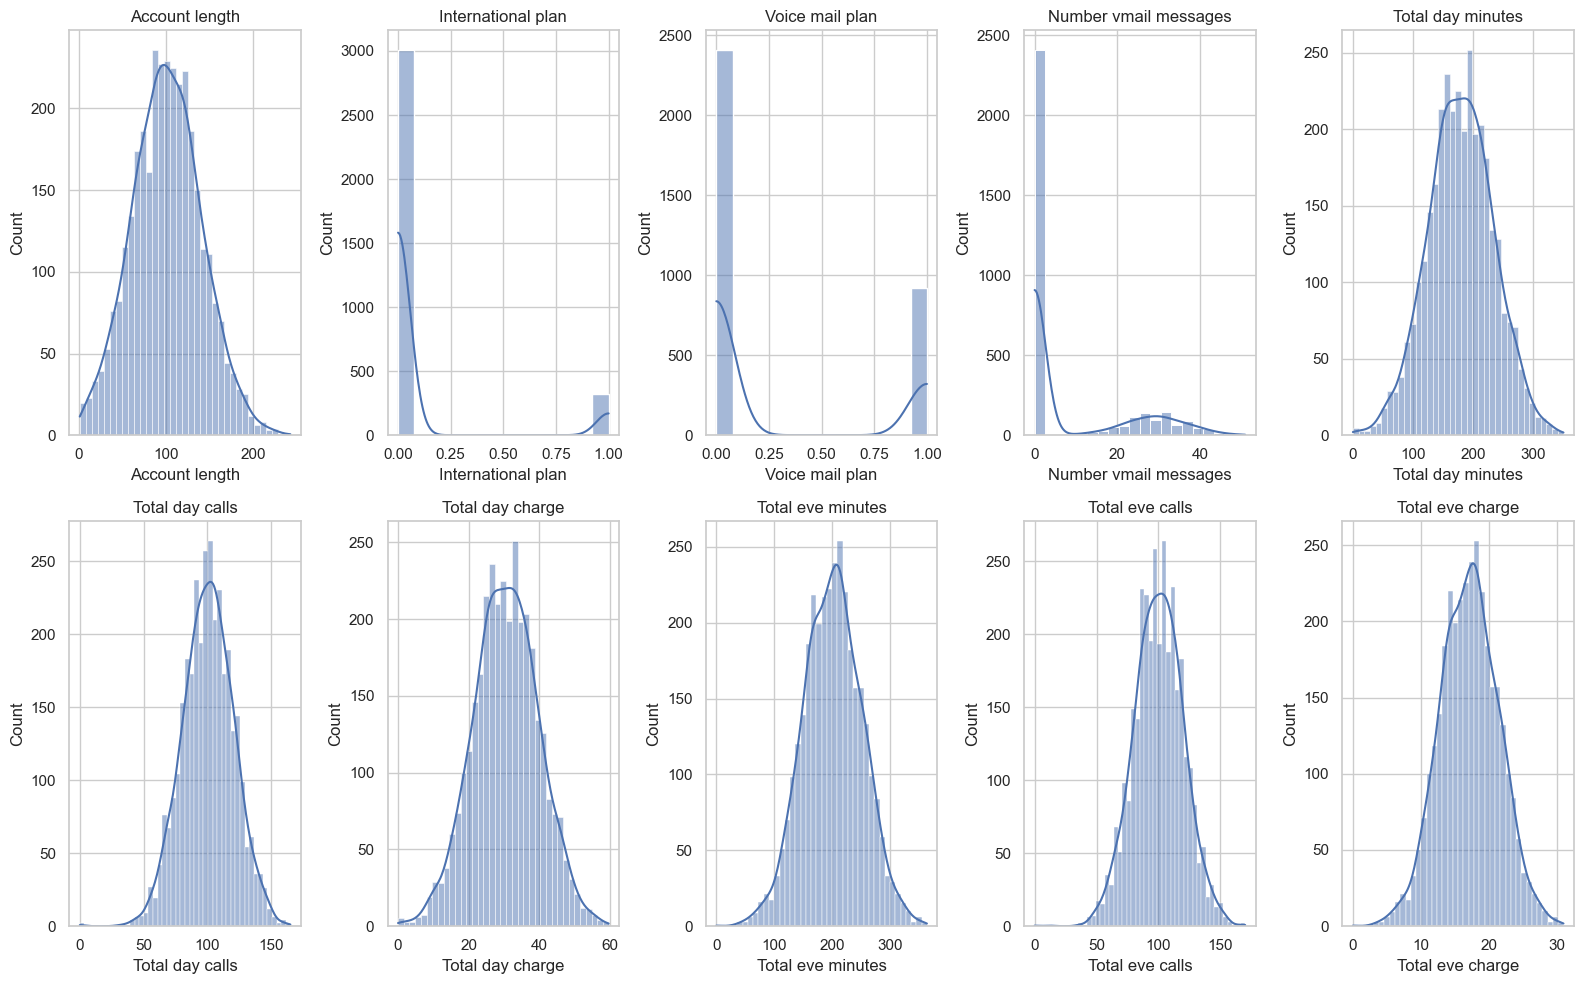

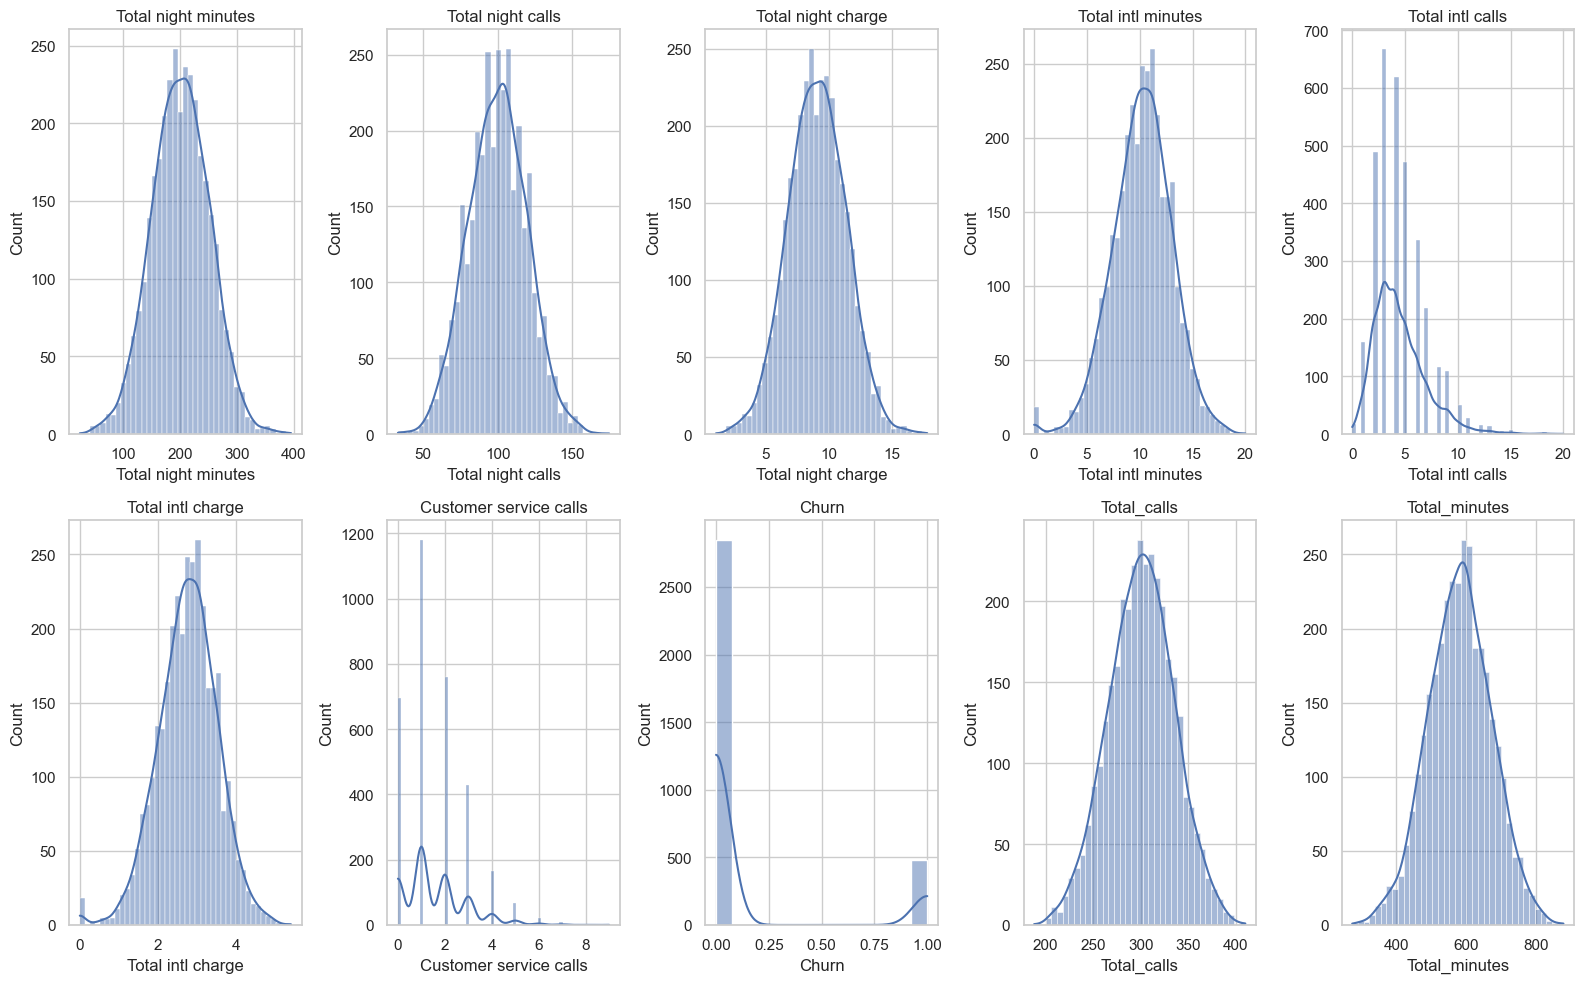

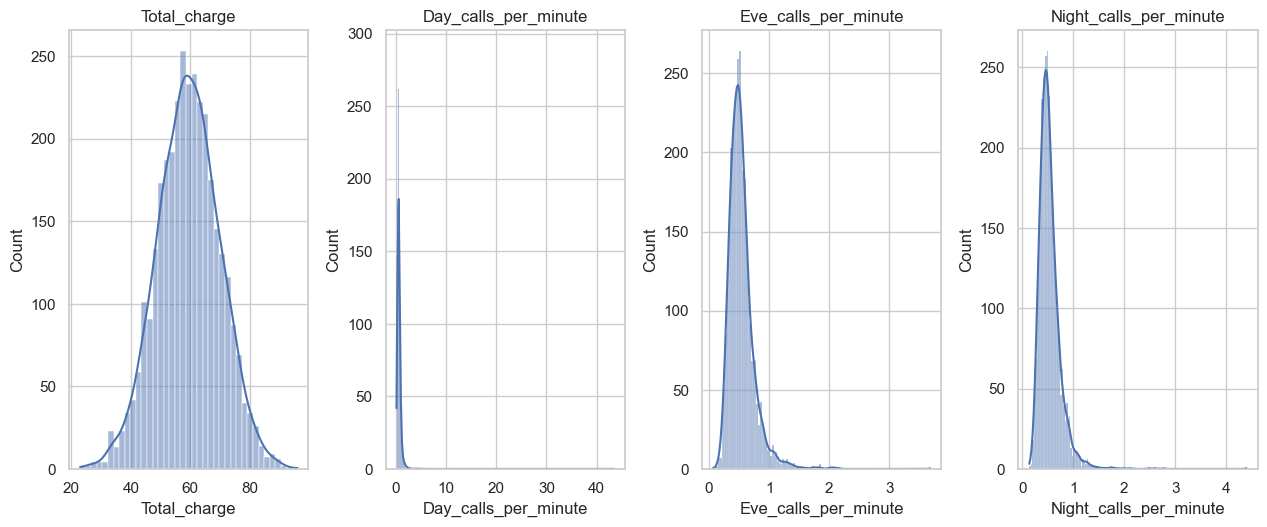

In [25]:
np.random.seed(0)

# 2. Distribution Plots using Seaborn
sns.set(style="whitegrid")

# Plot histograms and KDE for numerical features
numerical_features = df1.select_dtypes(include=[np.number]).columns

# Split the features into chunks of 10 to avoid the subplot limit error
chunk_size = 10
for i in range(0, len(numerical_features), chunk_size):
    plt.figure(figsize=(16, 10))
    for j, feature in enumerate(numerical_features[i:i + chunk_size]):
        plt.subplot(2, 5, j + 1)
        sns.histplot(df1[feature], kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

#### Histogram Analysis

Account length:

This graph shows a nearly normal distribution centered around 100 days, indicating that most customers have had their 
accounts for about 100 days, with fewer customers having very short or very long account durations.

International plan:

This histogram is highly skewed to the left, showing that the vast majority of customers (near 0 on the x-axis) do not have
an international plan. A small number of customers (near 1 on the x-axis) have opted for the international plan.

Voice mail plan:

Similar to the international plan, this distribution is also heavily skewed to the left. Most customers do not have a voice 
mail plan (0 on the x-axis), while a minority have the plan (1 on the x-axis).

Number vmail messages:

This distribution is heavily right-skewed, indicating that most customers have not used the voicemail service (0 messages),
and only a few customers have left a significant number of voicemail messages.

Total day minutes:

This graph is approximately normally distributed, centered around 200 minutes. It shows that most customers use around 200 
minutes of daytime calling, with fewer customers having significantly lower or higher usage.

### 4.2 Bivariate Analysis

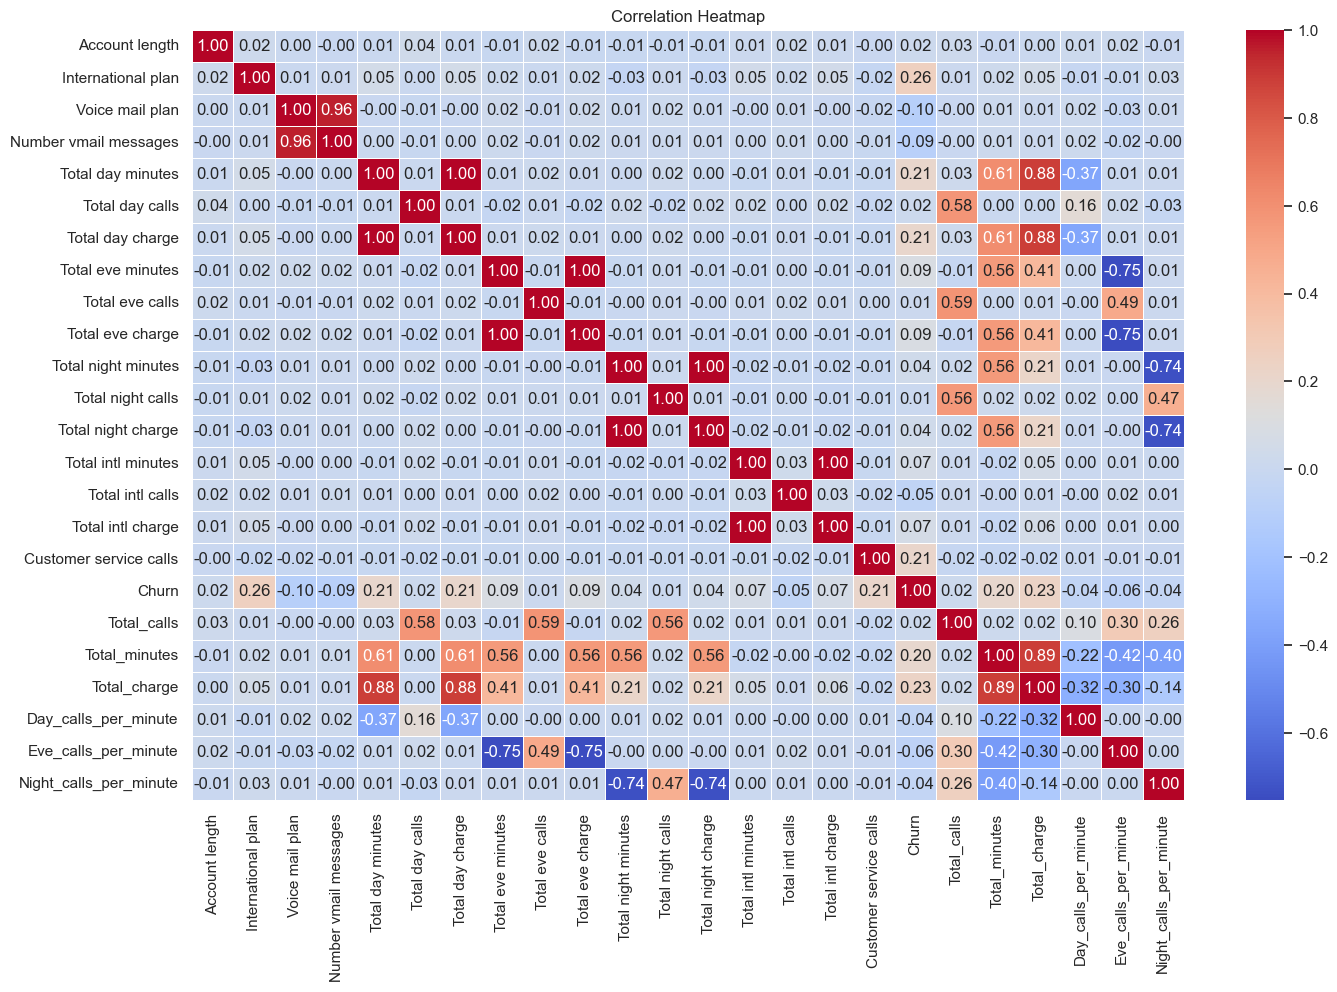

In [26]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation coefficients range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation,
0 indicates no correlation.

High Positive Correlations:

Total day minutes, Total day charge: These have a correlation coefficient of 1.00, indicating a perfect positive correlation.
This makes sense as the charge is directly proportional to the usage.
Total eve minutes, Total eve charge: Similar to the day minutes and charge, this pair also shows a perfect positive correlation.
Total night minutes, Total night charge: This pair follows the same pattern with a perfect positive correlation.
Total intl minutes, Total intl charge: This pair also has a perfect positive correlation.
    
Negative Correlations:

Day_calls_per_minute and Total day minutes: There is a moderate negative correlation (-0.37), suggesting that as the number
of total day minutes increases, the number of calls per minute decreases.
Eve_calls_per_minute and Total eve minutes: There is a moderate negative correlation (-0.49).
Night_calls_per_minute and Total night minutes: There is a moderate negative correlation (-0.74), suggesting that as the 
total night minutes increase, the number of night calls per minute decreases significantly.

Low or No Correlations:

Account length and most other variables: The correlations here are very low, indicating that the length of time a customer 
has had an account does not significantly correlate with their usage patterns or likelihood to churn.
Customer service calls and most other variables: These generally show low correlations, except for churn, where there is a 
moderate positive correlation (0.21), indicating that customers who call customer service more frequently are somewhat more 
likely to churn.

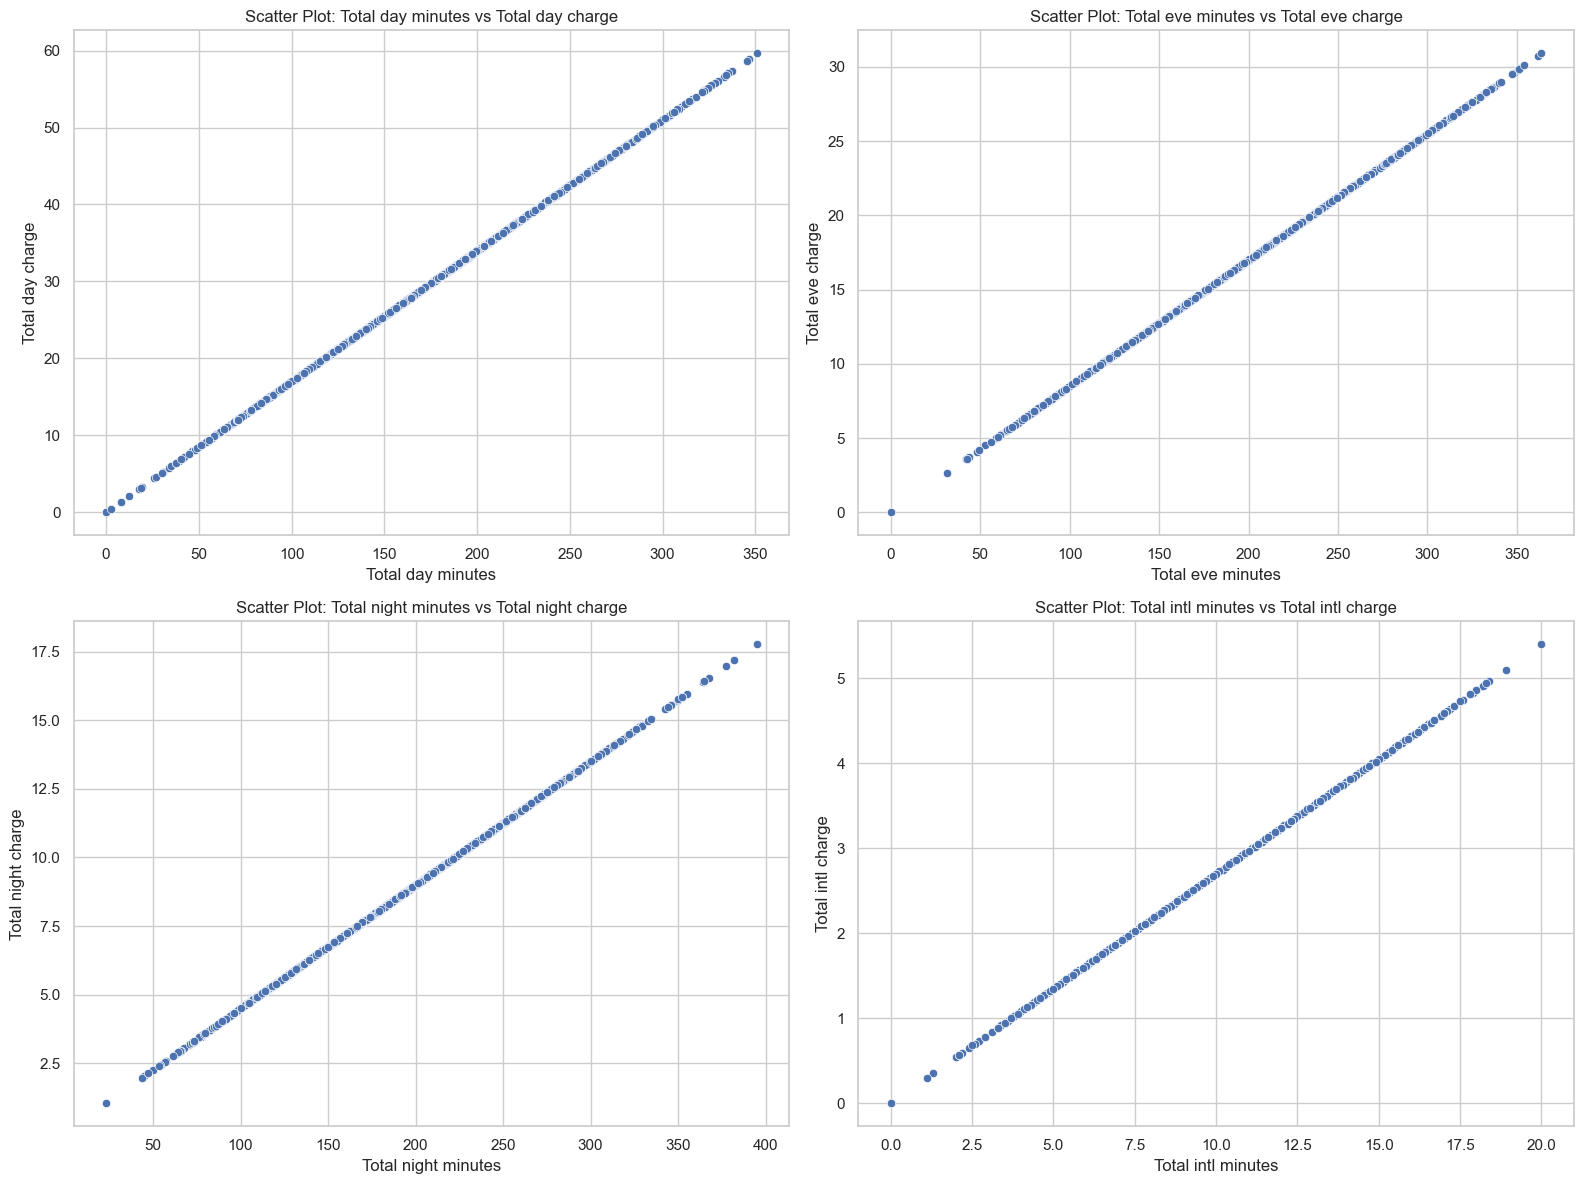

In [27]:
# Scatter plots for selected pairs of variables
pairs = [
    ('Total day minutes', 'Total day charge'),
    ('Total eve minutes', 'Total eve charge'),
    ('Total night minutes', 'Total night charge'),
    ('Total intl minutes', 'Total intl charge')
]

plt.figure(figsize=(16, 12))
for i, (var1, var2) in enumerate(pairs):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df1, x=var1, y=var2)
    plt.title(f'Scatter Plot: {var1} vs {var2}')
plt.tight_layout()
plt.show()

These scatter plots display the relationship between the number of minutes used and the corresponding charges across different
time periods (day, evening, night, and international).

1. Total Day Minutes vs. Total Day Charge:

The scatter plot shows a perfect linear relationship, indicating that as the total day minutes increase, the total day charge
increases proportionally.
This strong positive linear correlation confirms that the billing is directly proportional to the usage of day minutes, which 
is expected as charges are calculated based on usage.

2. Total Eve Minutes vs. Total Eve Charge:

Similar to the day minutes and charges, this scatter plot also shows a perfect linear relationship.
The total evening minutes are directly proportional to the total evening charge, indicating a consistent billing structure for
evening calls.

3. Total Night Minutes vs. Total Night Charge:

This plot also exhibits a perfect linear relationship, demonstrating that as the total night minutes increase, the total night 
charge increases in a directly proportional manner.
This consistency across different times of the day (day, evening, night) suggests a straightforward billing system where 
charges are directly based on the minutes used.

4. Total Intl Minutes vs. Total Intl Charge:

The scatter plot of total international minutes vs. total international charge also shows a perfect linear relationship.
This indicates that international charges are directly proportional to the international minutes used, consistent with the 
patterns observed in domestic call charges.

All scatter plots exhibit a perfect positive linear relationship between minutes used and corresponding charges, 
reflecting a proportional billing system. This suggests that the telecom company's charging structure is consistent and linear,
meaning customers are charged a fixed rate per minute for their calls, regardless of whether the calls are made during the day, 
evening, night, or internationally.

C:\Users\Victor Keya\Documents\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


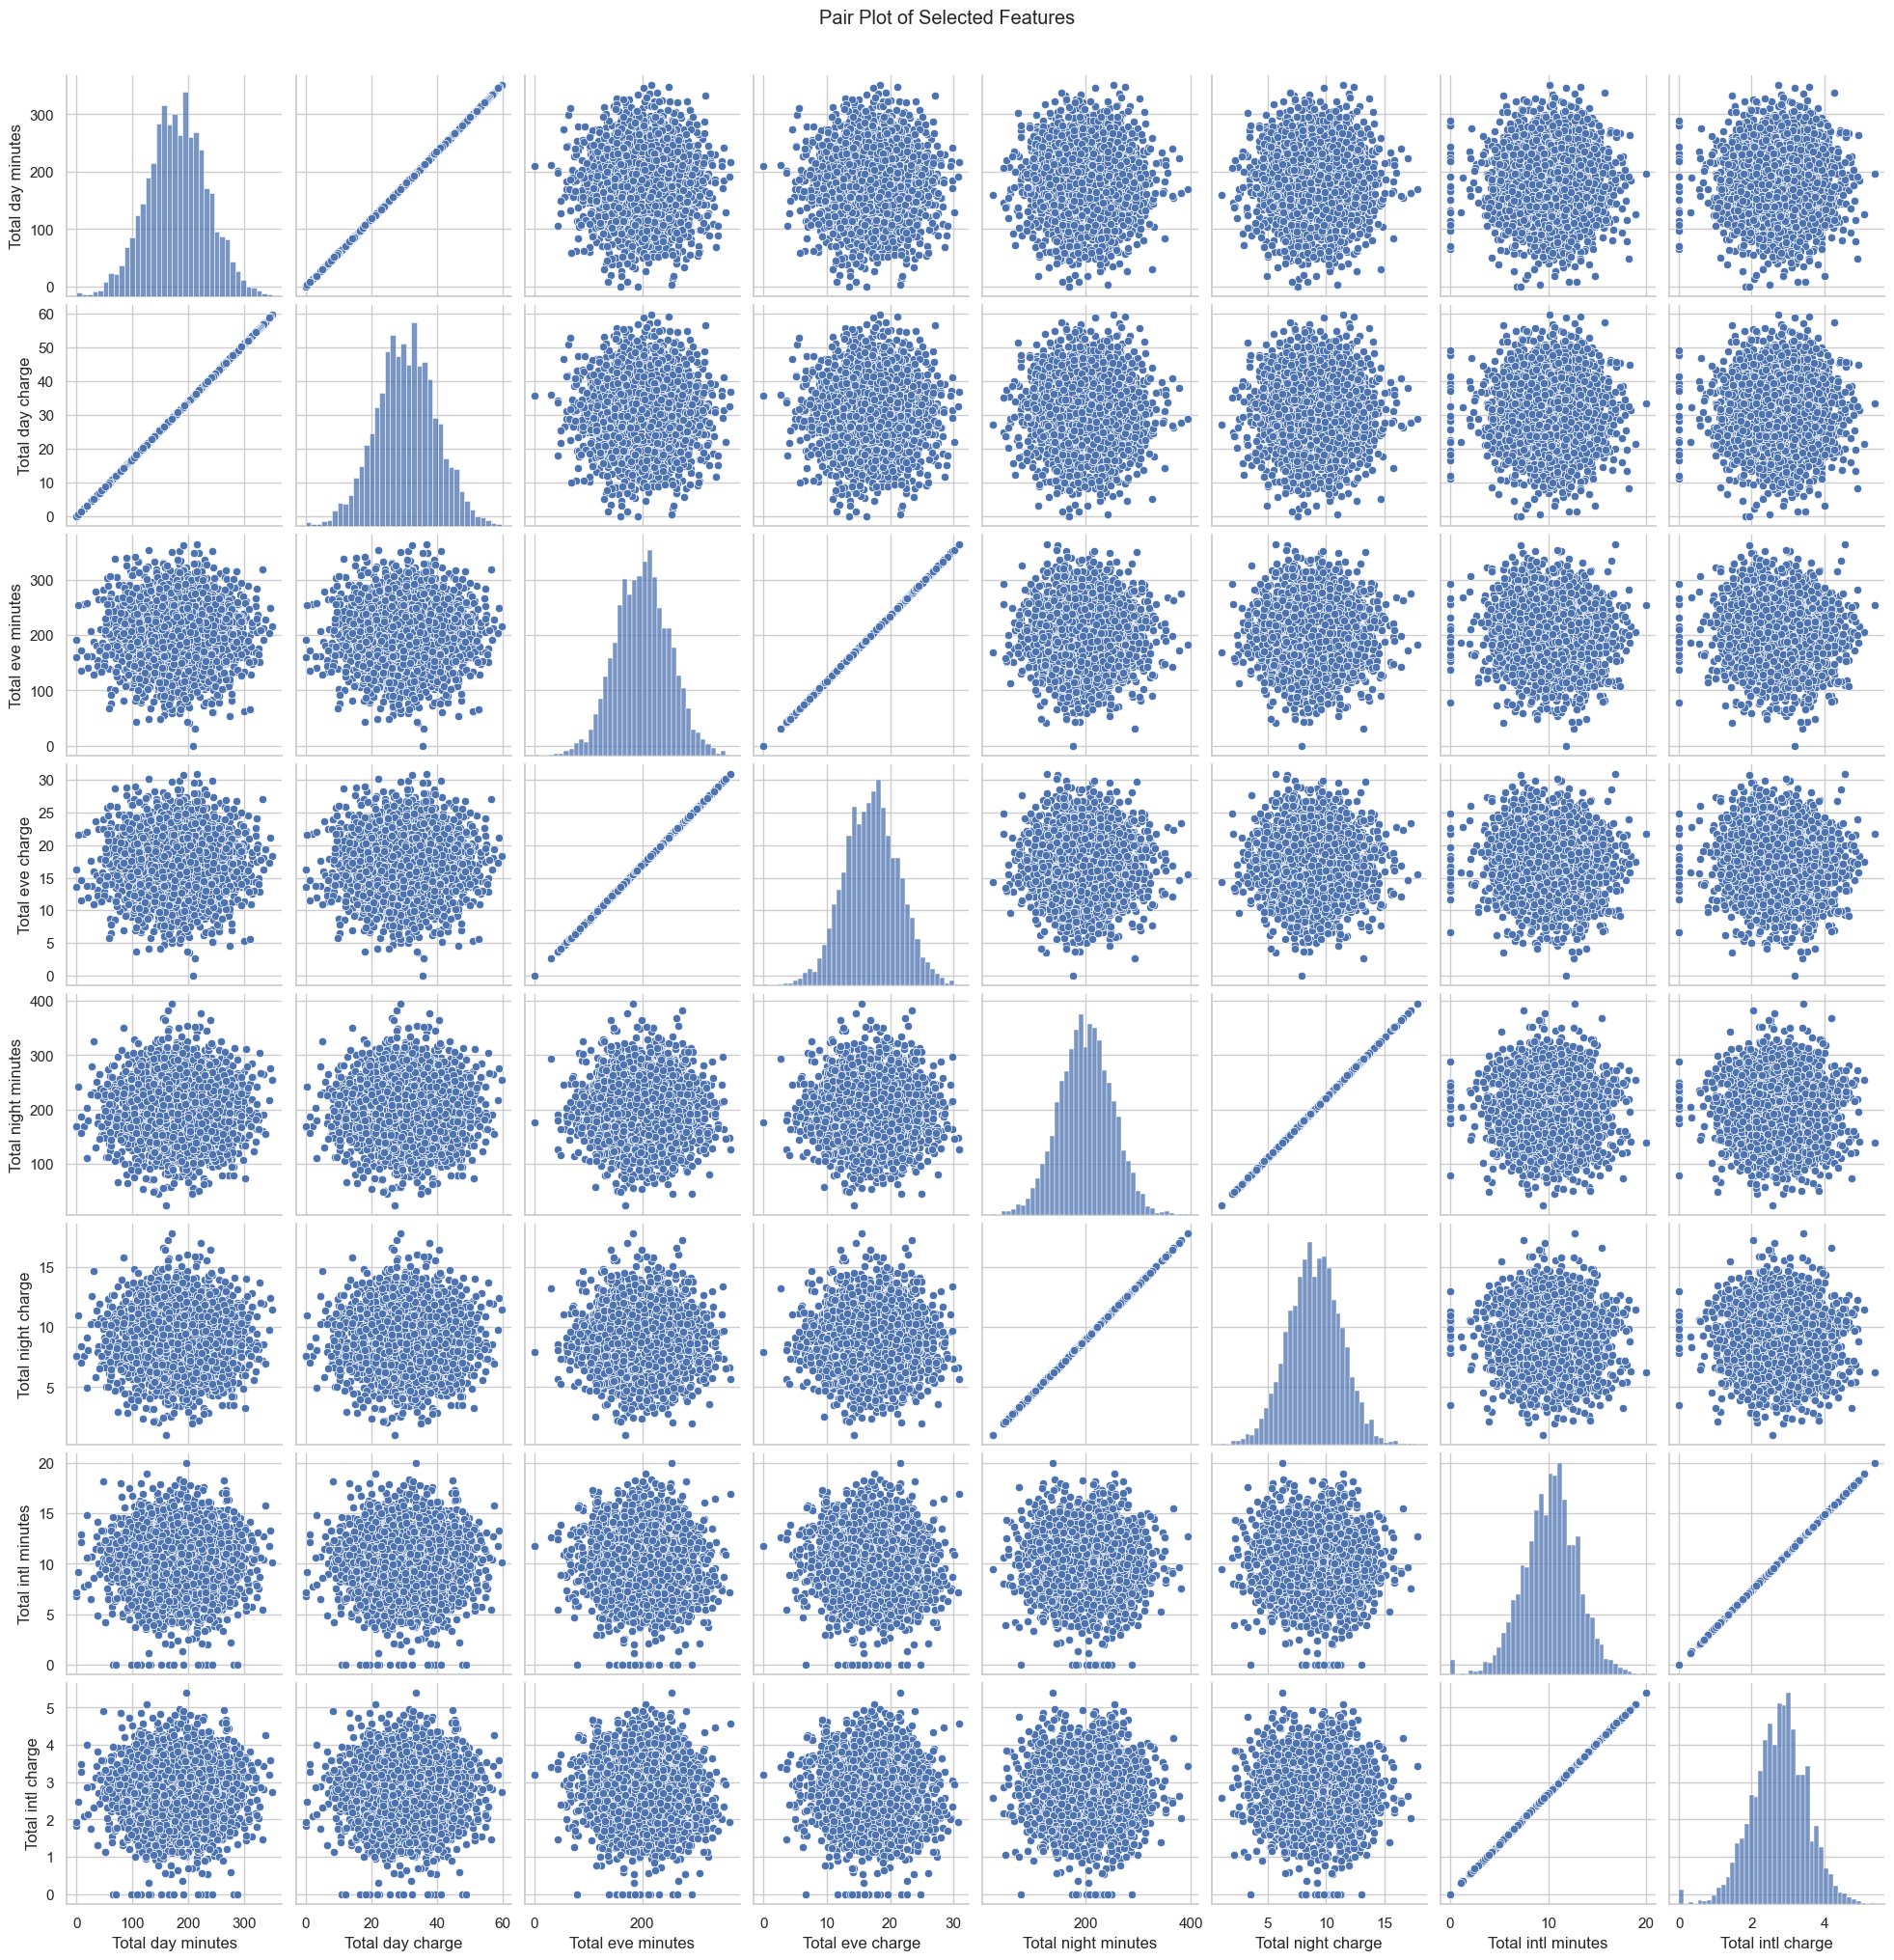

In [28]:
# Pair plots for a subset of the features
subset_features = [
    'Total day minutes', 'Total day charge',
    'Total eve minutes', 'Total eve charge',
    'Total night minutes', 'Total night charge',
    'Total intl minutes', 'Total intl charge'
]

sns.pairplot(df1[subset_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

## 4.3 Multivariate Analysis

C:\Users\Victor Keya\Documents\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

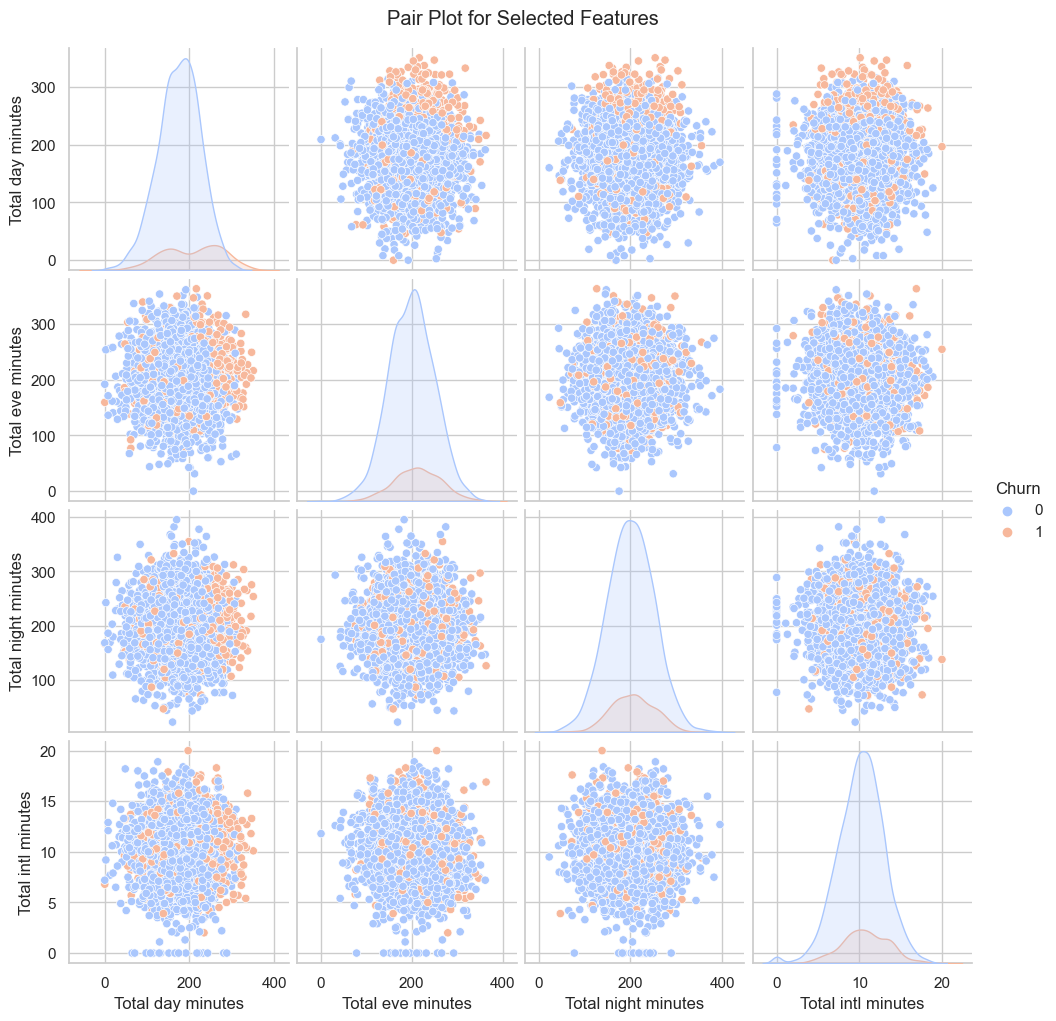

In [29]:
# Pair plot for a subset of features
plt.figure(figsize=(10, 10))
subset_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Churn']
sns.pairplot(df1[subset_features], hue='Churn', palette='coolwarm')
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()

This pair plot visualizes the relationships between selected features in the SyriaTel dataset, specifically focusing on various
types of minutes used by customers and their churn status. Each dot represents a customer, with blue indicating non-churned 
customers (Churn = 0) and orange indicating churned customers (Churn = 1).

Key Observations:

Diagonal Plots:

These plots show the distribution of each feature. The kernel density estimation (KDE) curves show the distribution for 
churned (orange) and non-churned (blue) customers.
Total Day Minutes, Total Eve Minutes, Total Night Minutes, Total Intl Minutes:
The distributions for churned and non-churned customers are similar, with a slight difference in the intensity of orange and 
blue, indicating that churned and non-churned customers have somewhat similar usage patterns across these time periods.
Off-Diagonal Plots:

These plots show the scatter relationships between pairs of features.
The scatter plots do not show strong linear relationships between the features, suggesting that individual minute usage features
might not strongly predict each other.

Churn Patterns:
Churn vs. Non-Churn:
There is a mix of blue and orange dots in most scatter plots, indicating that churned customers have usage patterns that are
broadly similar to those of non-churned customers.
Slight differences in distribution might be more apparent with advanced statistical methods but are not immediately obvious in
this pair plot visualization.

Insights:
Overall Similarity: The usage patterns of churned and non-churned customers are largely similar across the different types of
call minutes.
Feature Independence: The lack of strong visible correlations between different types of call minutes suggests that these 
features might act independently of each other in influencing churn.

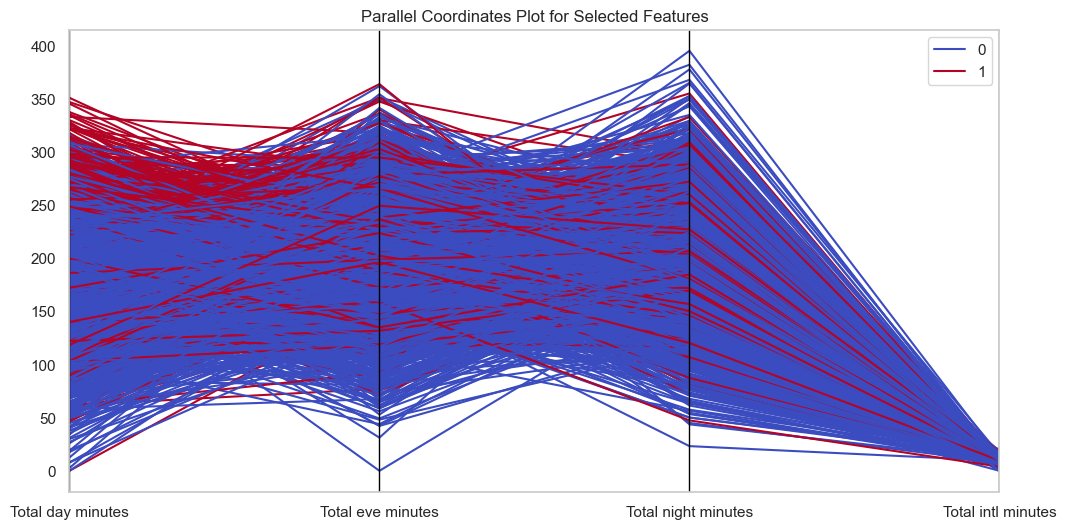

In [30]:
# Parallel coordinates plot for a subset of features
plt.figure(figsize=(12, 6))
parallel_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Churn']
parallel_coordinates(df1[parallel_features], class_column='Churn', colormap='coolwarm')
plt.title('Parallel Coordinates Plot for Selected Features')
plt.show()

This parallel coordinates plot visualizes the relationships between selected features in the SyriaTel dataset and the churn 
status of customers. Each line represents a customer, with blue lines indicating non-churned customers (Churn = 0) and red lines
indicating churned customers (Churn = 1)

## 5. Data Preprocessing

### 5.1 Train-Test Split

In [31]:
#Handle Missing Values
df1.fillna(df1.mean(), inplace=True)


In [32]:
# Define features and target
X = df1.drop(columns=['Churn'])
y = df1['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 5.2 Feature Scaling

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.81666076, -0.32942967, -0.61058295, ..., -0.3729483 ,
        -0.12880568,  0.54110596],
       [ 0.02926645, -0.32942967, -0.61058295, ...,  0.52194962,
        -1.01010079,  1.26341822],
       [-0.71713991, -0.32942967, -0.61058295, ..., -0.74120513,
         2.74310286, -0.44815204],
       ...,
       [ 0.52687068, -0.32942967, -0.61058295, ..., -0.35641865,
        -0.04224218, -0.10615051],
       [ 0.75079259, -0.32942967, -0.61058295, ..., -0.13244234,
        -0.16340447,  0.35462517],
       [ 0.12878729, -0.32942967, -0.61058295, ..., -0.22918336,
        -0.83882258,  1.74494651]])

### 5.3 Model Training

### 5.3.1 Logistic Regression Model

In [34]:
# Train logistic regression model
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Display model coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)

Accuracy: 0.8455772113943029
Confusion Matrix:
[[548  21]
 [ 82  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       569
           1       0.43      0.16      0.24        98

    accuracy                           0.85       667
   macro avg       0.65      0.56      0.58       667
weighted avg       0.81      0.85      0.81       667

                        Coefficient  Odds Ratio
Account length             0.029762    1.030210
International plan         0.621476    1.861674
Voice mail plan           -0.767956    0.463960
Number vmail messages      0.362316    1.436653
Total day minutes          0.248454    1.282041
Total day calls           -0.041988    0.958881
Total day charge           0.248824    1.282516
Total eve minutes          0.089268    1.093374
Total eve calls            0.008920    1.008960
Total eve charge           0.090330    1.094535
Total night minutes       -0.071785    0.930731
Tota

#### Logistic Regression Model Justification

Logistic Regression is simple and interpretable.

It shows clear coefficients and odds ratios, making it easy to understand the impact of each feature on churn.

However, it struggles with class imbalance, as indicated by low precision and recall for the minority class (churn).

#### Logistic Regression Results

#### Business Insights:
    
1. Understanding Customer Churn
High Precision for Non-Churners: The model accurately predicts customers who are not likely to churn (precision of 0.87 and recall of 0.96). This means the company can trust the model when it says a customer is not likely to churn.
Low Precision and Recall for Churners: The model struggles to accurately predict customers who are likely to churn (precision of 0.43 and recall of 0.16). This indicates that the model is not very reliable in identifying customers who will churn, potentially missing many at-risk customers.

2. Key Drivers of Churn
Positive Association with Churn:
International Plan: Customers with an international plan are more likely to churn. The company might need to investigate if the international plan's value proposition is clear and competitive.
Total Day Minutes/Charge: Higher usage during the day is associated with churn. This might indicate dissatisfaction with peak-time service quality or pricing.
Customer Service Calls: Customers who contact customer service frequently are more likely to churn. This is a critical insight suggesting that customer service interactions need improvement.

3. Negative Association with Churn:
Voice Mail Plan: Customers with a voice mail plan are less likely to churn. This might indicate satisfaction with additional services.
Total Night Minutes/Charge: Higher usage during night times is associated with lower churn. This might suggest that services during off-peak times are satisfactory.



#### Recommendations for Business Improvement
1. Enhancing Customer Service
Training and Quality: Invest in customer service training and quality improvements to reduce the number of issues leading to customer service calls.
Proactive Support: Implement proactive customer support to resolve issues before they escalate, based on frequent service calls.
2. Product and Service Review
International Plan Evaluation: Review and possibly revamp the international plan. Conduct customer surveys to understand pain points and improve the offering.
Daytime Service Quality: Investigate the quality of service during peak times. Improve network infrastructure if needed to enhance the customer experience during high usage periods.
3. Customer Retention Strategies
Targeted Promotions: Use the model's predictions to target likely churners with personalized promotions and incentives to stay.
Loyalty Programs: Develop loyalty programs for customers with high usage, especially those using the service during nights and having voice mail plans.
4. Feature Improvements
Voice Mail Plan: Promote voice mail plans as they are associated with lower churn. Consider bundling voice mail plans with other services to increase overall customer satisfaction.
5. Data-Driven Decision Making
Continuous Monitoring: Regularly update the model with new data to keep track of changing customer behaviors and improve prediction accuracy over time.
Expand Features: Collect more data on customer behavior and feedback to enhance the model's predictive power and provide deeper insights.

### 5.3.2 Decision Tree Model

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.943
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       855
           1       0.79      0.83      0.81       145

    accuracy                           0.94      1000
   macro avg       0.88      0.90      0.89      1000
weighted avg       0.94      0.94      0.94      1000



#### Decision Tree Model Justification

Decision Tree provides a high accuracy and a good performance for both classes.

It captures complex patterns in the data but can overfit easily.

Less interpretable compared to Logistic Regression but provides feature importance.


#### Business Insights

1. Key Drivers of Churn:
    
Check if features such as "Customer service calls" and "Total day minutes" are significant predictors:

Customer Service Calls: High number of customer service calls might indicate unresolved issues. The company can improve 
customer service quality by training agents better, reducing wait times, and resolving issues more effectively.

Total Day Minutes: High usage might be correlated with dissatisfaction if it leads to high charges. Consider introducing 
more competitive pricing plans or offering discounts to high-usage customers.

2. Targeted Retention Campaigns:
The company can segment customers based on their likelihood of churning.

High-Risk Customers: Implement targeted retention strategies such as personalized offers, discounts, loyalty programs, 
and proactive customer service outreach to high-risk customers.
Medium-Risk Customers: Monitor these customers and offer periodic incentives to ensure they remain satisfied.
    
3. Resource Allocation:
Efficiently allocate resources to areas that will have the most impact on reducing churn.

Customer Support: Allocate more resources to improve customer service for customers identified as high-risk.
Marketing Efforts: Direct marketing efforts towards high-risk customers with personalized engagement strategies.
    
4. Pricing Strategies:
If the model indicates that high charges are a significant predictor of churn, the company can reconsider its pricing strategy.

Flexible Pricing Plans: Introduce more flexible or usage-based pricing plans to cater to different customer segments.

#### Implementing Insights

#### Feature Importance Analysis:

In [37]:
#Identify and list the top features influencing churn.

feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                   Feature  Importance
19            Total_charge    0.424844
16  Customer service calls    0.129130
3    Number vmail messages    0.113011
15       Total intl charge    0.078476
1       International plan    0.071625
14        Total intl calls    0.069650
18           Total_minutes    0.025016
5          Total day calls    0.019376
8          Total eve calls    0.013838
0           Account length    0.010808
11       Total night calls    0.008297
10     Total night minutes    0.007544
12      Total night charge    0.005305
2          Voice mail plan    0.004325
21    Eve_calls_per_minute    0.003594
6         Total day charge    0.003460
20    Day_calls_per_minute    0.003432
9         Total eve charge    0.002956
22  Night_calls_per_minute    0.002595
4        Total day minutes    0.002307
13      Total intl minutes    0.000411
7        Total eve minutes    0.000000
17             Total_calls    0.000000


#### Prediction and Customer Segmentation:

In [38]:
#Predict churn probabilities 
churn_probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Assuming class 1 is churn


C:\Users\Victor Keya\Documents\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### 5.3.3 Random Forest Classifier

In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Selection and Hyperparameter Tuning
#param_grid = {
    #'n_estimators': [50, 100, 200],
    #'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}
#rf = RandomForestClassifier(random_state=42)
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

#Train the Random Forest model
model = RandomForestClassifier(random_state=1)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Feature importances
feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Accuracy: 0.9805097451274363
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667

[[566   0]
 [ 13  88]]
                   Feature  Importance
19            Total_charge    0.177486
16  Customer service calls    0.124370
1       International plan    0.069990
18           Total_minutes    0.065448
4        Total day minutes    0.065063
6         Total day charge    0.065059
2          Voice mail plan    0.035000
3    Number vmail messages    0.034710
14        Total intl calls    0.034375
13      Total intl minutes    0.033676
20    Day_calls_per_minute    0.031905
15       Total intl charge    0.031098
7        Total eve minutes    0.027055
9         Total eve charge    0.026072
5          Total day calls    0.0227

#### Random Forest Classifier Model Justification

Random Forest provides the highest accuracy and balanced performance across both classes.

It is less prone to overfitting compared to a single Decision Tree.

Provides a robust understanding of feature importance.

#### Business Insights and Actions

1. Address High Charges:

Analyze the relationship between high total charges and churn. Consider offering discounts or loyalty programs to high-usage 
customers to enhance their satisfaction and reduce churn risk.

2. Improve Customer Service:

Since frequent customer service calls are a strong churn predictor, focus on improving the quality of customer service. 
Implement training programs for service representatives and ensure quick resolution of customer issues.

3. Monitor High Usage:

Keep an eye on customers with high total day minutes and total minutes. Provide them with personalized offers or services 
to increase their satisfaction.

4. International Plan Customers:

Pay special attention to customers with international plans. Ensure their specific needs are met, possibly by providing 
better international call rates or packages.

#### Which Model Is best for My DataSet

Random Forest emerges as the best model based on:

Accuracy: Highest among the three models (0.97).

Balanced Performance: High precision and recall for both churn and non-churn classes, indicating robustness in handling class imbalance.

Feature Importance: Provides clear insights into the most influential factors affecting churn, which can guide strategic business decisions.

Generalization: Less likely to overfit compared to Decision Trees, making it more reliable for unseen data.

In [40]:
df1

Account length  International plan  Voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      ...  Total intl calls  Total intl charge  Customer service calls  Churn  \
0     ...                 3               2.70                       1      0   
1     ...                 3               3.70                       1      0   
2     ...                 5               3.29                       0      0   
3     ...                 7               1.78                       2      0   
4     ...                 3               2.73                       3      0   
...   ...               ...                ...                     ...    ...   
3328  ...                 6               2.67                       2      0   
3329  ...                 4               2.59                       3      0   
3330  ...                 6               3.81                       2      0   
3331  ...                10               1.35                       2      0   
3332  ...                 4               3.70                       0      0   

      Total_calls  Total_minutes  Total_charge  Day_calls_per_minute  \
0             300          707.2         75.56              0.414938   
1             329          611.5         59.24              0.761139   
2             328          527.2         62.29              0.468365   
3             248          558.2         66.80              0.237141   
4             356          501.9         52.09              0.677864   
...           ...            ...           ...                   ...   
3328          286          650